# colorCoder

Takes in an image, analyzes the top n color distributions. Working to omit background colors.

In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
import sklearn
from sklearn.cluster import KMeans
import os
from collections import Counter

In [77]:
def read_images(image_directory):
    
    images = {}
    for filename in os.listdir(image_directory):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(image_directory, filename)
            image = cv.imread(file_path)
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            if image is not None:
                images[filename] = image
        else:
            print(f"Failed to load image: {filename}")
    return images

test = read_images("test/")
vogue = read_images("vogue/")

In [92]:
def kmeans(dictionary, n_clusters=5):
    results = {}
    
    for key, image in dictionary.items():
        clt = KMeans(n_clusters)
        clt = clt.fit(image.reshape(-1, 3))
        results[key] = clt

    return results

test_kmean = kmeans(test)
vogue_kmean = kmeans(vogue)

In [93]:
for key, value in vogue_kmean.items():
    print(key, value.cluster_centers_)

sept23.jpg [[ 67.75472861  58.59943114  55.8370704 ]
 [220.40389273 216.17173808 219.56814479]
 [ 20.66101038  16.06813916  13.66524484]
 [119.81959469 108.90065662 104.75209032]
 [171.43493717 154.65839947 147.26016865]]
mar23.jpg [[ 48.05135171  24.67175879  19.83690375]
 [233.77118229 181.97201569  94.78878993]
 [164.55409353  92.06045673  45.65780984]
 [136.65238542 138.45455321 144.60006828]
 [219.15825388 223.44838599 217.59676048]]
aug23.jpg [[172.43857735 204.8346607  217.23374427]
 [152.25183241 111.26168479  61.37077694]
 [108.80787724 134.82539616 143.20654764]
 [ 30.39646256  32.67341706  27.74081961]
 [236.37293986 225.94178388 208.95625162]]
apr23.jpg [[145.88167019 145.7408646  147.33925146]
 [ 41.06537071  31.537997    31.7002777 ]
 [199.10456948 212.5145361  220.84653638]
 [ 79.56992387  94.88048806 124.04494734]
 [106.53291189  73.87131569  58.13544054]]
oct23.jpg [[ 97.51021255  64.90112976  53.91702304]
 [248.58883146 239.12080673 237.96675788]
 [202.61848759 167.90

In [94]:
def display(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [106]:
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

In [103]:
def show(dictionary1, dictionary2):
    results = {}
    
    # Assuming both dictionaries have the same keys
    for key1, key2 in zip(dictionary1.keys(), dictionary2.keys()):
        if key1 == key2: 
            result = display(dictionary1[key1], palette_perc(dictionary2[key2]))
            results[key1] = result
    return results

{0: 0.06, 1: 0.03, 2: 0.49, 3: 0.05, 4: 0.37}
[[187.62389681 167.99592668 138.59277247]
 [ 89.27366439  67.84557439  49.56179998]
 [214.01889868 207.51296974 196.20663169]
 [141.04949403 109.88427608  83.30974312]
 [ 17.88156347  16.26844743  11.25659506]]


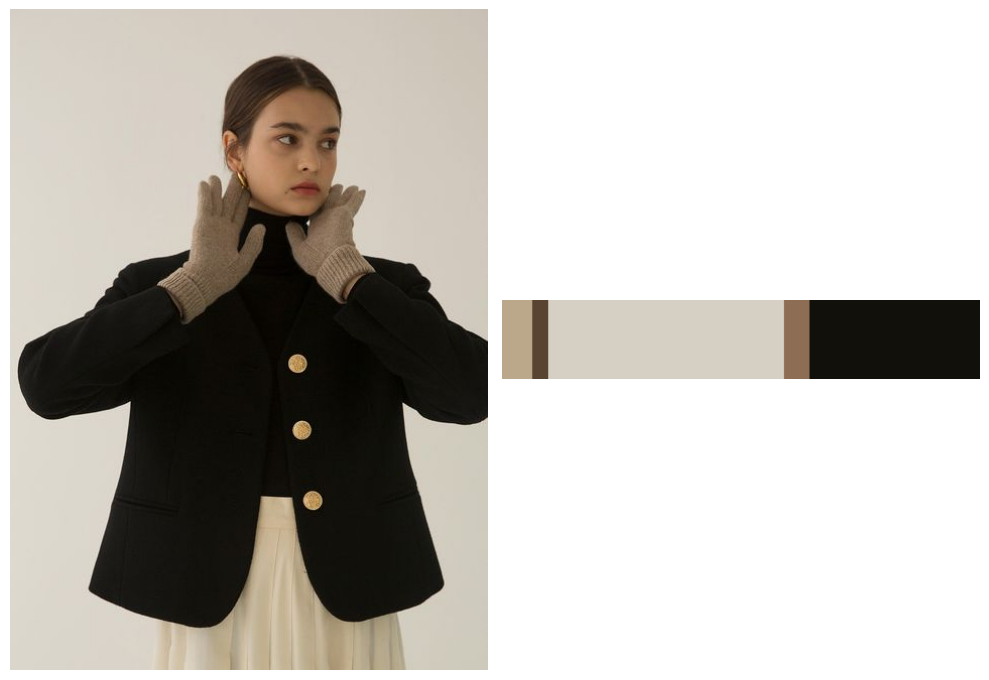

{0: 0.19, 1: 0.28, 2: 0.15, 3: 0.16, 4: 0.22}
[[171.17246627 149.17981667 123.20688343]
 [ 25.30781182  17.10587707  14.30282323]
 [ 99.75128079  85.92825322  66.12202076]
 [163.68777942 120.40832959  70.19354425]
 [ 55.72892599  43.77152866  37.61687411]]


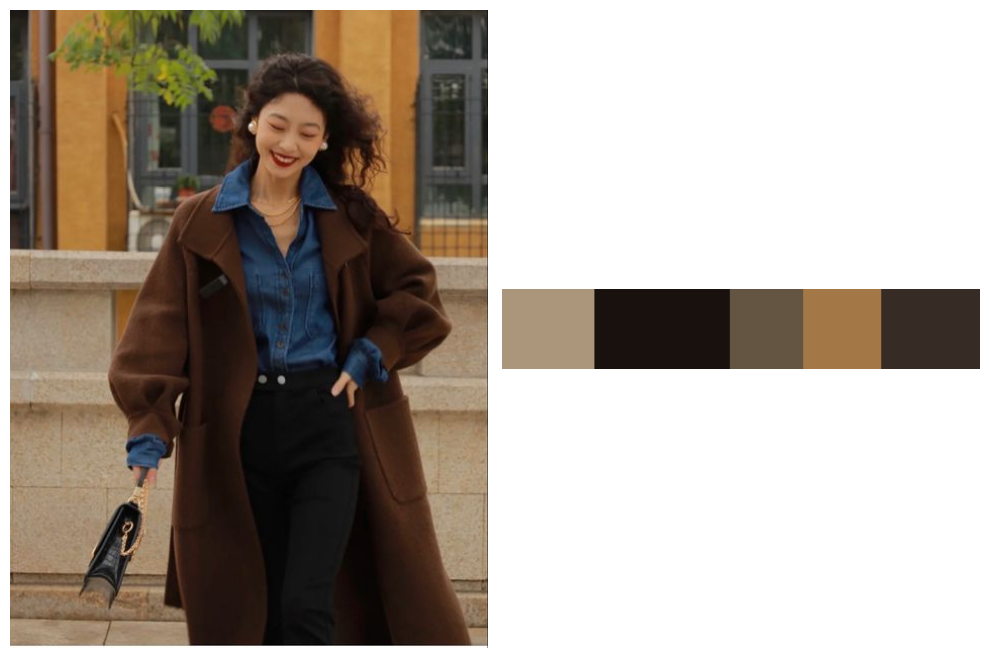

{0: 0.27, 1: 0.13, 2: 0.37, 3: 0.13, 4: 0.1}
[[ 63.28076044  63.91991521  46.8523278 ]
 [161.54097279 152.34277459 141.2490445 ]
 [ 14.96819111  11.28316276  11.040779  ]
 [198.54927283 191.72344386 178.1109715 ]
 [120.4854087  108.94640476  99.17236986]]


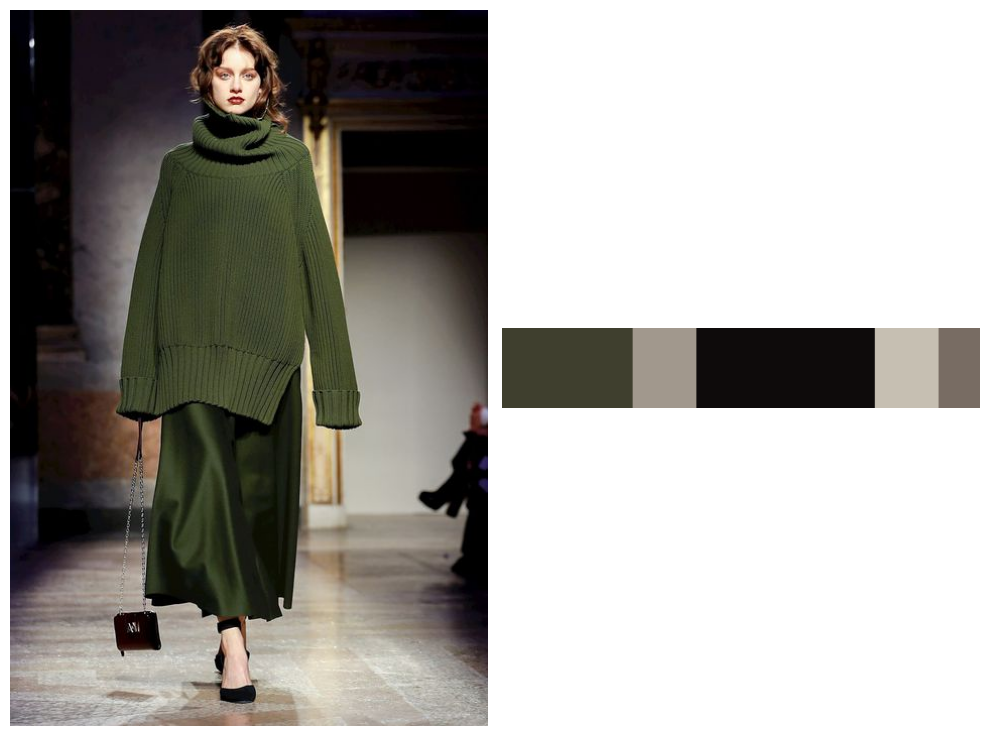

{0: 0.32, 1: 0.27, 2: 0.13, 3: 0.18, 4: 0.11}
[[218.35452854 211.71956967 207.74556308]
 [ 31.02716093  26.10185908  34.50656147]
 [153.75491894 143.55613771 134.11733489]
 [191.76999901 183.75827288 177.53007718]
 [118.00732518 108.47309404 100.96805094]]


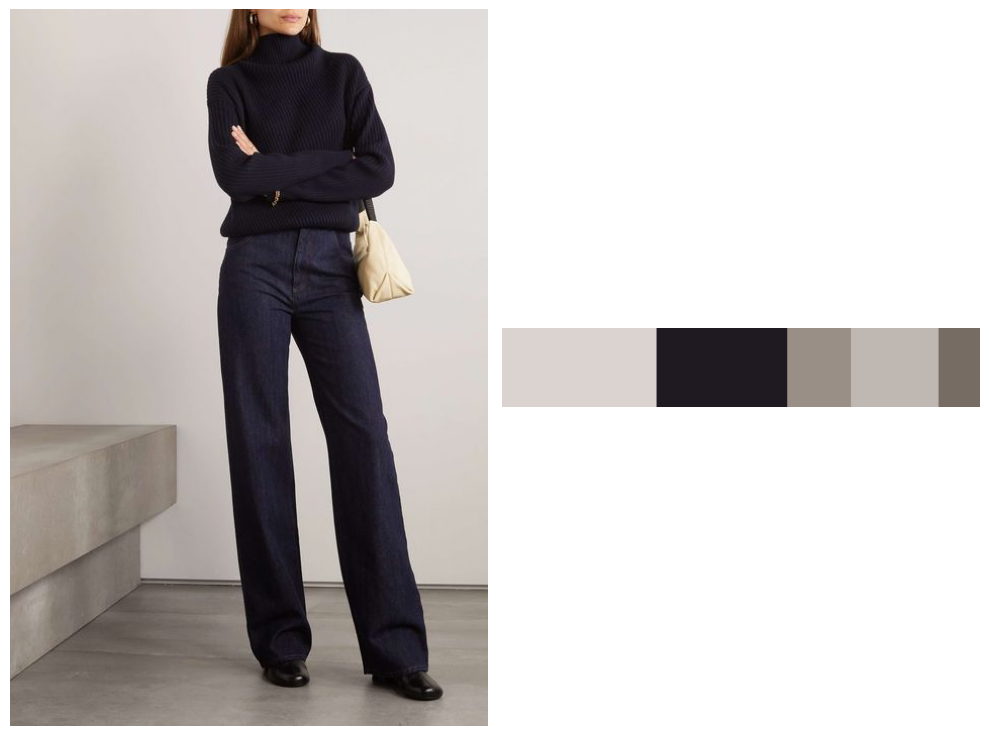

{0: 0.08, 1: 0.38, 2: 0.27, 3: 0.05, 4: 0.22}
[[163.06661673 161.98422359 165.14226862]
 [ 33.86938516  34.39746286  39.62664647]
 [113.72234455 116.13964346 118.70945193]
 [216.56958355 215.11900369 217.43812599]
 [ 79.15913658  72.12445712  71.55921436]]


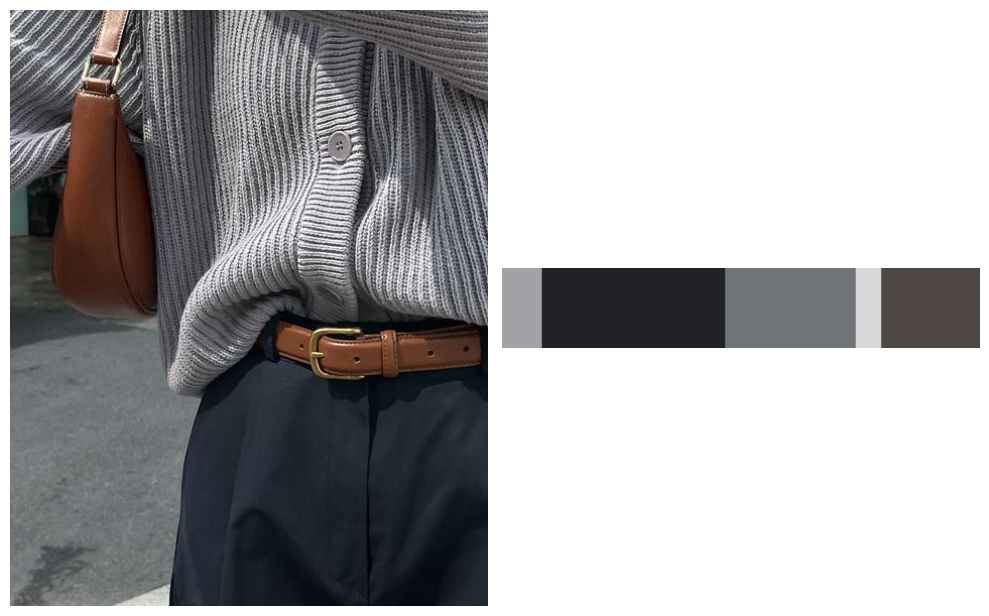

{'c05457d9d23d4a4280bfdec09ff54353.jpg': None,
 '4405f08acc44b4573ca00ff74a6e3019.jpg': None,
 'e2dcfc895a03a368228900d892e223f4.jpg': None,
 'test.jpg': None,
 'caeb0fca16097243537696b6c4c2a3fd.jpg': None}

In [104]:
show(test, test_kmean)

In [110]:
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

{0: 0.15, 1: 0.16, 2: 0.46, 3: 0.15, 4: 0.09}
[[ 67.75472861  58.59943114  55.8370704 ]
 [220.40389273 216.17173808 219.56814479]
 [ 20.66101038  16.06813916  13.66524484]
 [119.81959469 108.90065662 104.75209032]
 [171.43493717 154.65839947 147.26016865]]


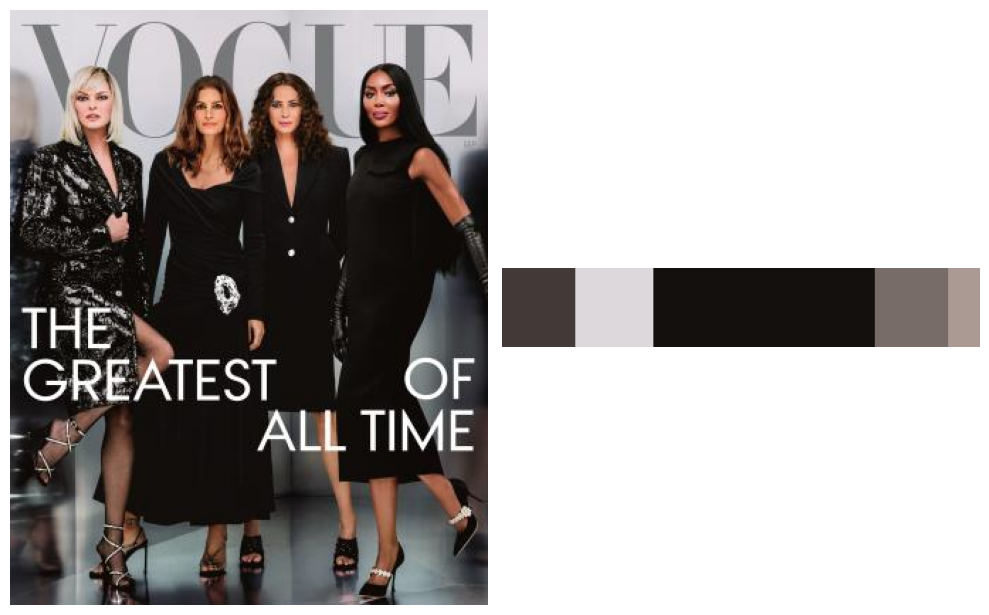

{0: 0.16, 1: 0.17, 2: 0.28, 3: 0.08, 4: 0.31}
[[ 48.05135171  24.67175879  19.83690375]
 [233.77118229 181.97201569  94.78878993]
 [164.55409353  92.06045673  45.65780984]
 [136.65238542 138.45455321 144.60006828]
 [219.15825388 223.44838599 217.59676048]]


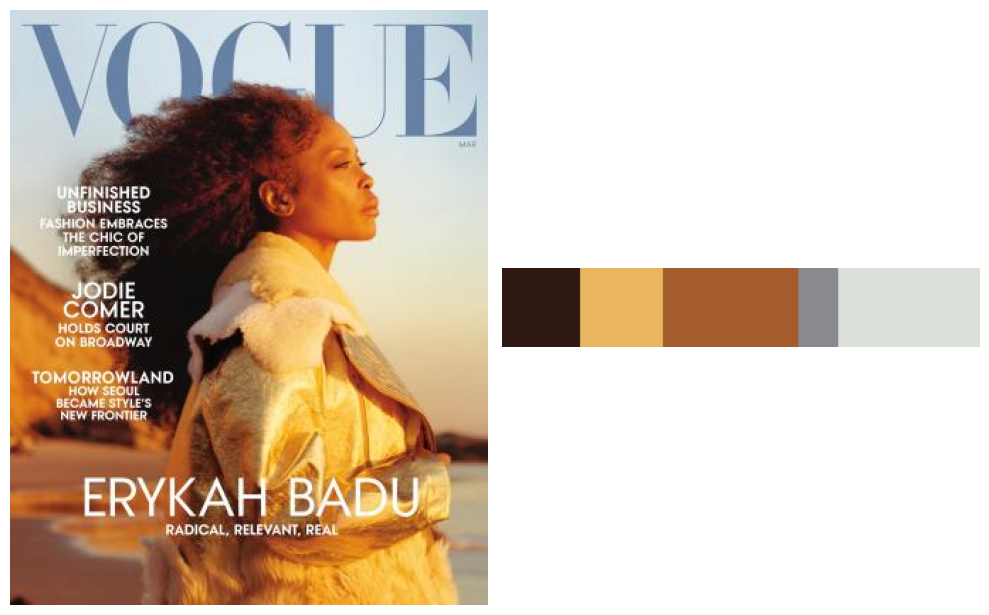

{0: 0.14, 1: 0.23, 2: 0.18, 3: 0.18, 4: 0.27}
[[172.43857735 204.8346607  217.23374427]
 [152.25183241 111.26168479  61.37077694]
 [108.80787724 134.82539616 143.20654764]
 [ 30.39646256  32.67341706  27.74081961]
 [236.37293986 225.94178388 208.95625162]]


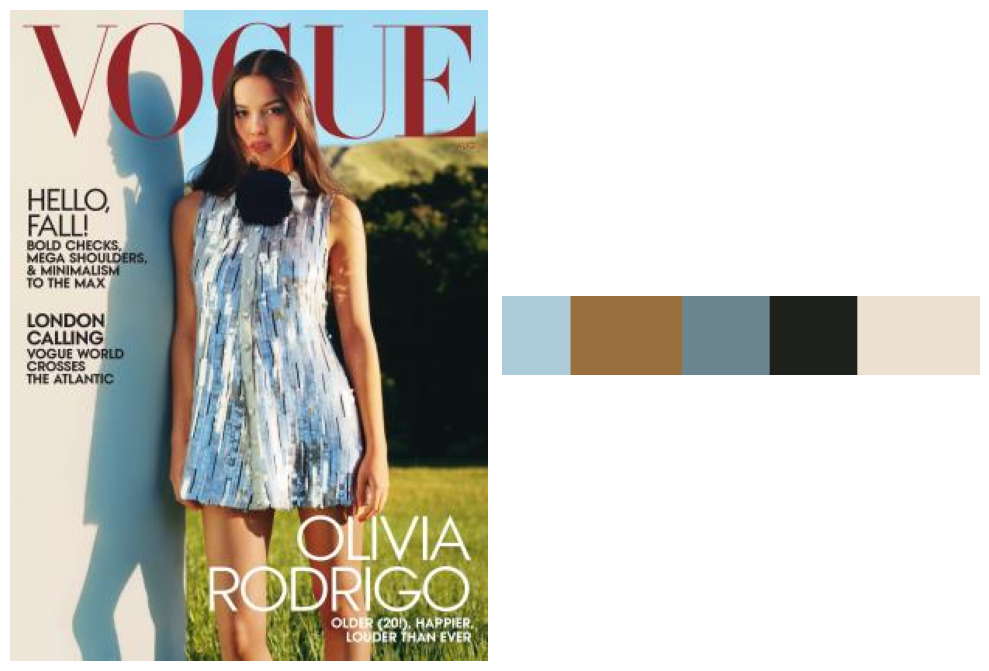

{0: 0.16, 1: 0.35, 2: 0.22, 3: 0.07, 4: 0.2}
[[145.88167019 145.7408646  147.33925146]
 [ 41.06537071  31.537997    31.7002777 ]
 [199.10456948 212.5145361  220.84653638]
 [ 79.56992387  94.88048806 124.04494734]
 [106.53291189  73.87131569  58.13544054]]


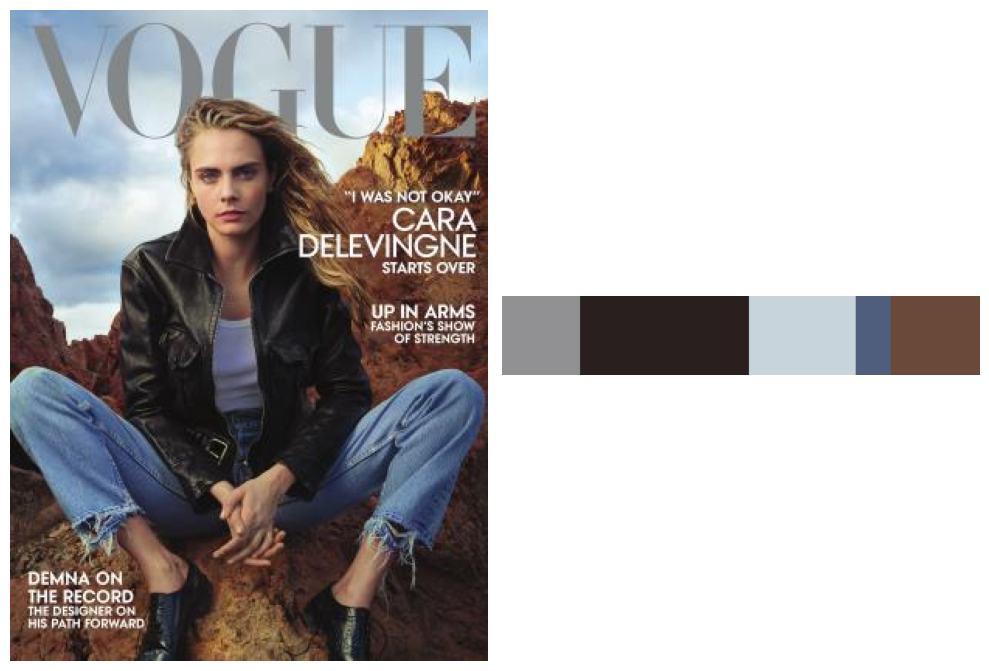

{0: 0.25, 1: 0.08, 2: 0.14, 3: 0.22, 4: 0.31}
[[ 97.51021255  64.90112976  53.91702304]
 [248.58883146 239.12080673 237.96675788]
 [202.61848759 167.90903211 166.5550982 ]
 [162.72286219 113.05710247  89.78233216]
 [ 40.4155555   17.01870857  12.80101349]]


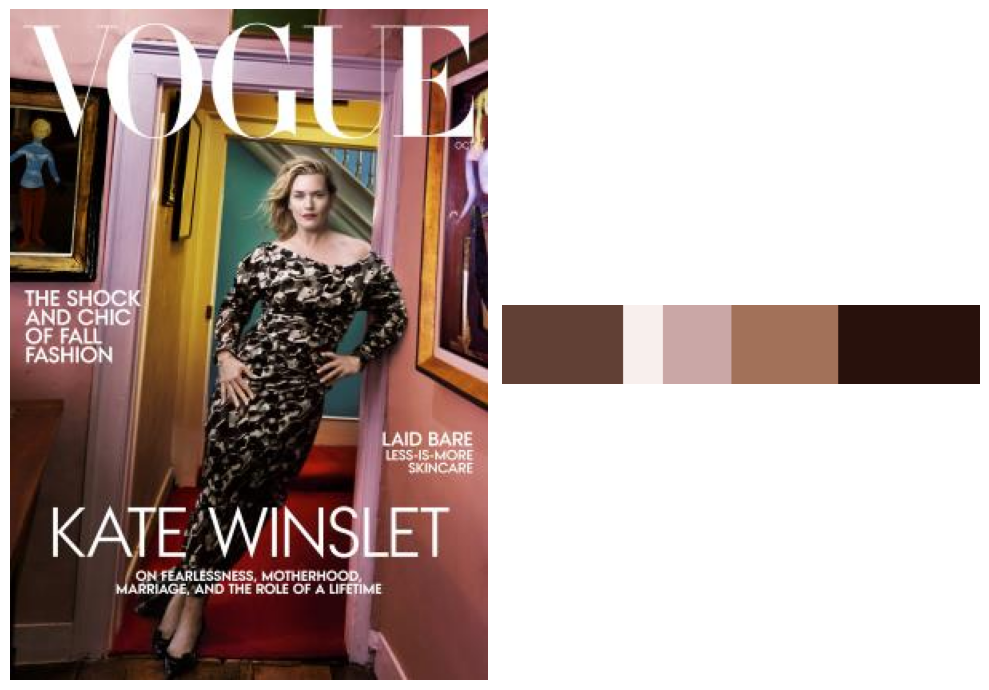

{0: 0.17, 1: 0.59, 2: 0.03, 3: 0.13, 4: 0.08}
[[201.86126984 113.04321995 117.85138322]
 [218.28669631  98.90271932 179.07156523]
 [ 31.15459573 163.00210693 227.1556492 ]
 [138.45400295  45.39545052  68.99090103]
 [247.927202   195.3614893  223.9479485 ]]


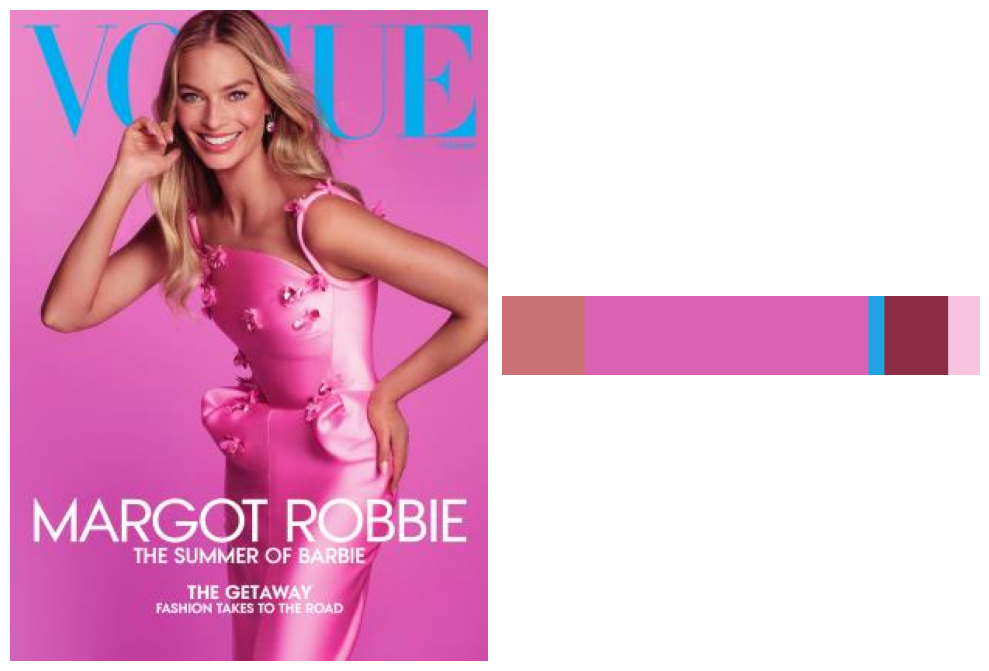

{0: 0.18, 1: 0.13, 2: 0.43, 3: 0.1, 4: 0.15}
[[179.9354402  159.9431823  119.7043195 ]
 [ 38.62723848  23.02155897  16.7477253 ]
 [200.24653936 194.90416696 158.38798183]
 [127.14694184  94.06896811  64.21643527]
 [231.53508912 224.99600958 198.70268688]]


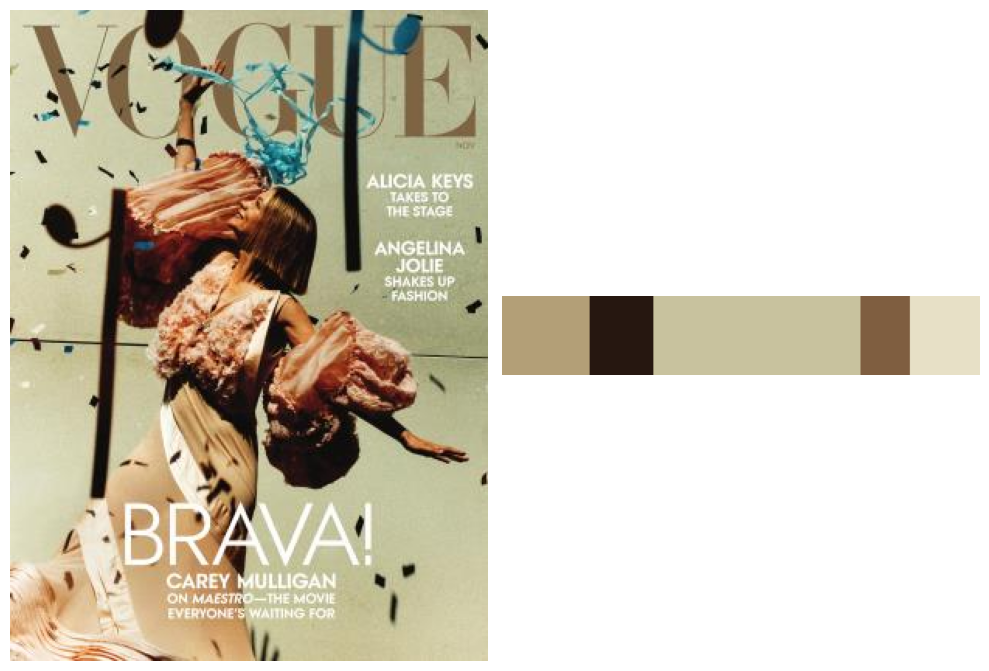

{0: 0.36, 1: 0.11, 2: 0.13, 3: 0.28, 4: 0.12}
[[133.24175996 120.03028411 100.63213059]
 [ 30.24832075  24.24617409  21.13911779]
 [228.3265195  223.46120351 206.3934684 ]
 [107.30562911  91.33156801  72.55214829]
 [186.15763951 172.98613483 155.90028004]]


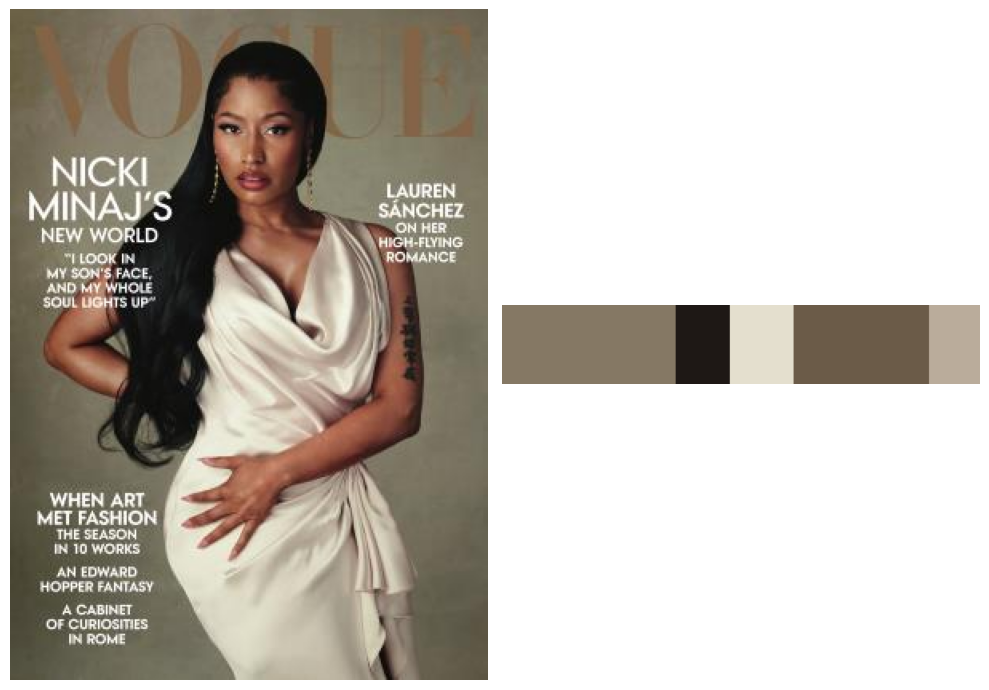

{0: 0.14, 1: 0.45, 2: 0.23, 3: 0.08, 4: 0.1}
[[110.85480515 180.96670978 174.90249114]
 [ 29.29312729  24.81105725  19.82428814]
 [104.56776059  68.54574275  56.10751115]
 [226.81708171 226.72687269 221.66756676]
 [169.46658302 143.92781263 126.75909661]]


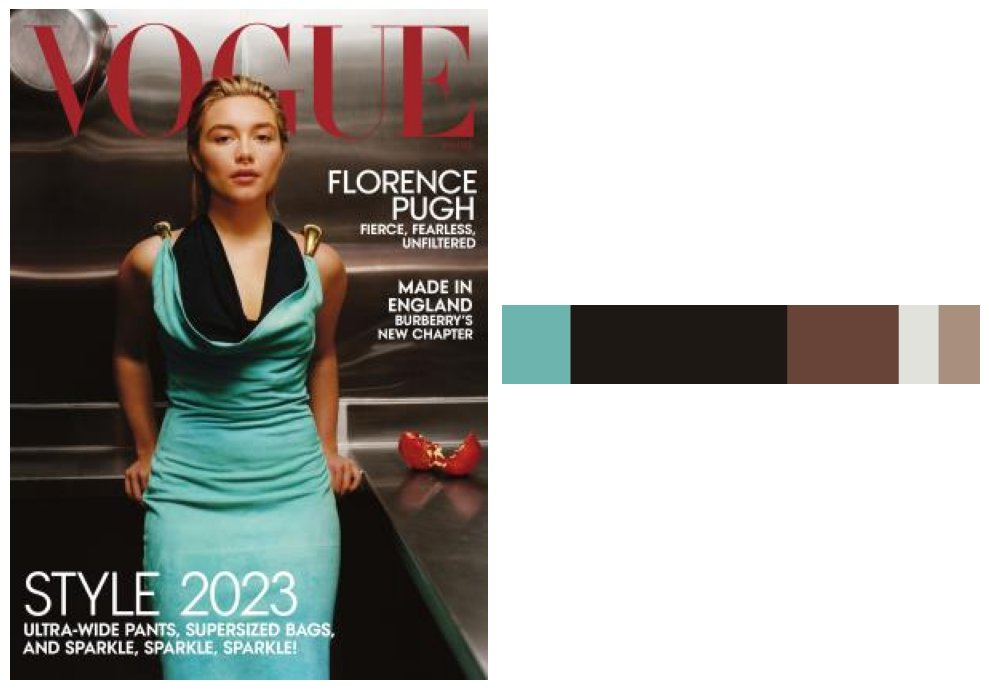

{0: 0.3, 1: 0.12, 2: 0.28, 3: 0.1, 4: 0.2}
[[ 97.83705749  88.47024977  71.91660646]
 [180.48679814 172.73668348 150.34134836]
 [ 52.65741658  45.9751404   37.01415042]
 [228.02918195 223.4441078  210.20730346]
 [135.08804533 128.10202077 104.58749764]]


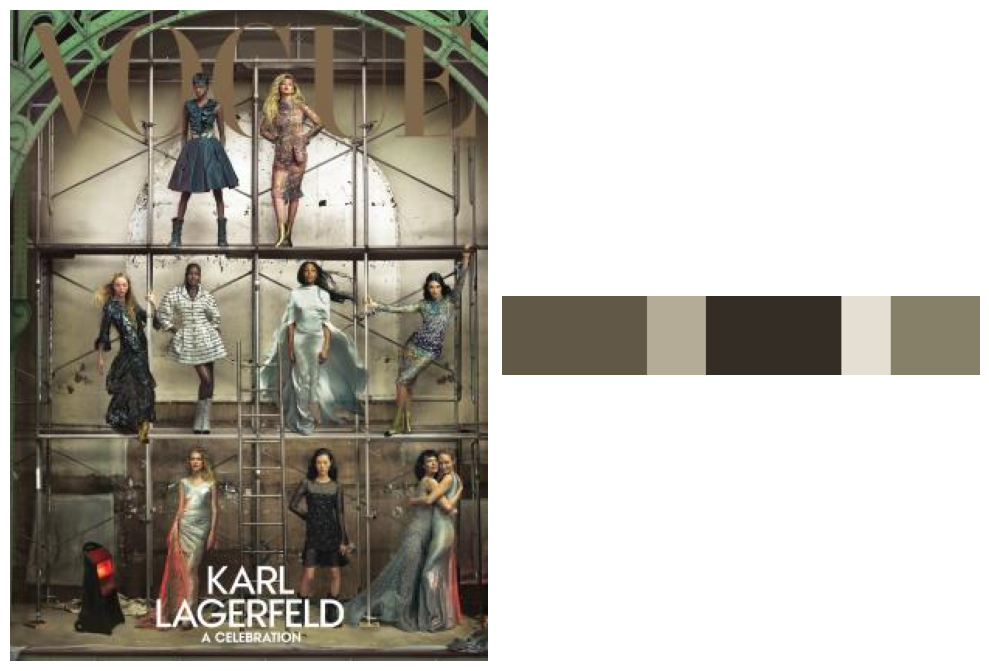

{'sept23.jpg': None,
 'mar23.jpg': None,
 'aug23.jpg': None,
 'apr23.jpg': None,
 'oct23.jpg': None,
 'sum23.jpg': None,
 'nov23.jpg': None,
 'dec23.jpg': None,
 'win23.jpg': None,
 'may23.jpg': None}

In [111]:
show(vogue, vogue_kmean)